In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import random
pip install tabulate
from tabulate import tabulate

Python NumPy loadtxt() function is used to load the data from a text file and store them in a ndarray. The purpose of loadtxt() function is to be a fast reader for simple text files. Each row in the text file must have the same number of values.

In [2]:
# load the datasets
Xtrain=np.loadtxt("Xtrain.txt")
Xtest=np.loadtxt("Xtest.txt")
Ytrain=np.loadtxt("Ytrain.txt")

In [3]:
Ytrain

array([-1., -1., -1., ..., -1., -1., -1.])

## Question 1

(i). How many training and test examples are there? How many positive and negative examples
are there in the training dataset?

In [17]:
# number of training examples
print("The number of training examples: ",len(Xtrain))

# number of test examples
print("The number of test examples: ",len(Xtest))

# number of positive and examples in the training set
pos=0
neg=0
for i in range(len(Ytrain)):
    if Ytrain[i]==1:
        pos+=1
    else:
        neg+=1
print("The number of positive examples: ",pos)
print("The number of negative examples: ",neg)

The number of training examples:  3000
The number of test examples:  3000
The number of positive examples:  611
The number of negative examples:  2389


(ii). Show at least 10 randomly selected objects of each class using plt.matshow by reshaping the
flattened array to 28x28. What are your observations about the nature of the data? Also
show 10 randomly selected objects from the test set. Do you see any issues in the data that
may limit the generalization performance of your classifier?

In [18]:
plus=[]
minus=[]
for i in range(len(Ytrain)):
    if Ytrain[i]==1:
        plus.append(i)
    else:
        minus.append(i)

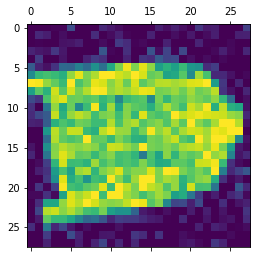

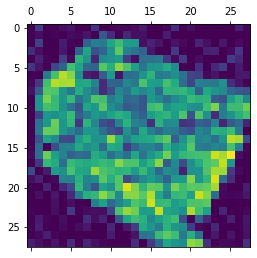

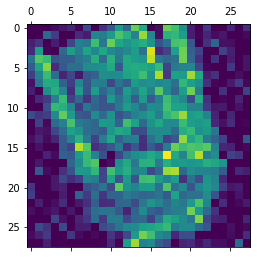

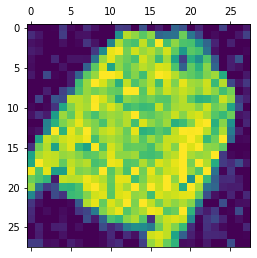

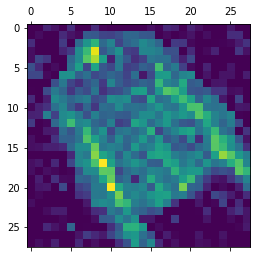

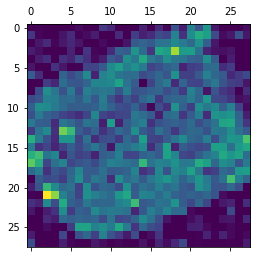

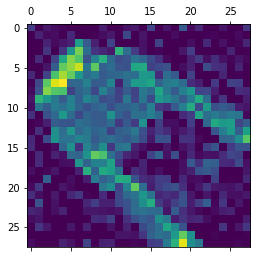

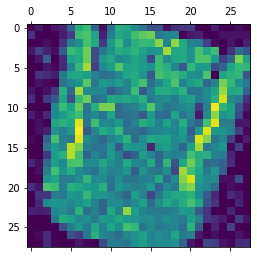

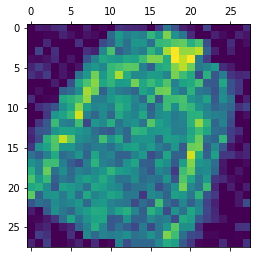

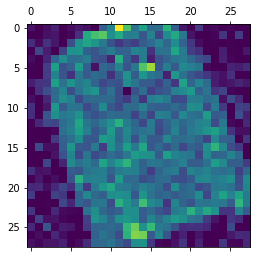

In [19]:
# 10 random images from the positive class
rand_plus=random.sample(plus,10)
for i in rand_plus:
    img=np.reshape(Xtrain[i],(28,28))
    plt.matshow(img)

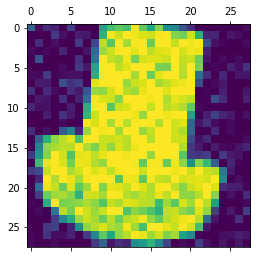

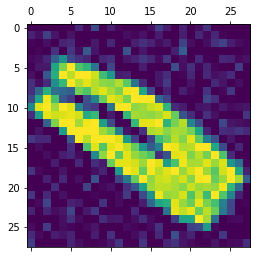

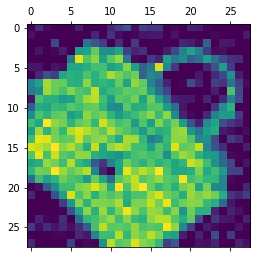

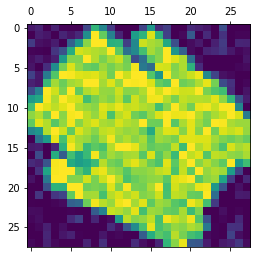

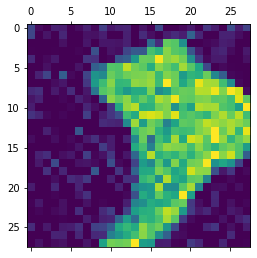

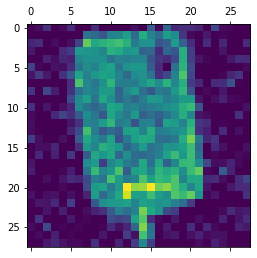

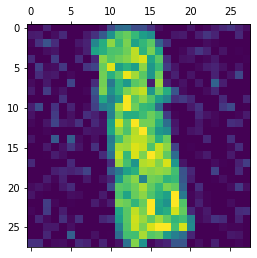

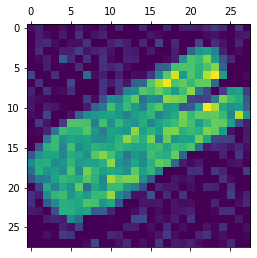

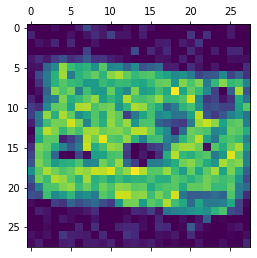

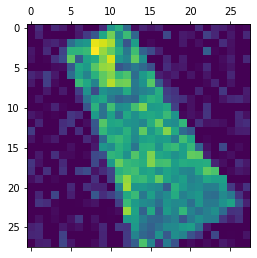

In [20]:
# 10 random images from the negative class
rand_minus=random.sample(minus,10)
for i in rand_minus:
    img=np.reshape(Xtrain[i],(28,28))
    plt.matshow(img)

Observations: The positive class contains long-sleeved shirts, whereeas the negative class consists of other objects.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6432\244809451.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(img)


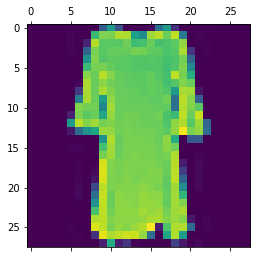

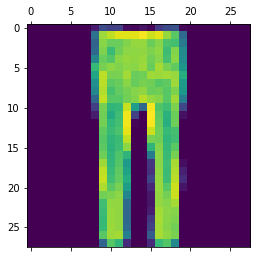

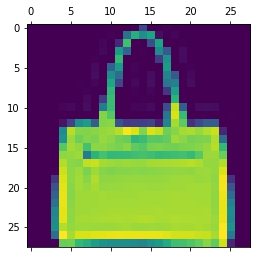

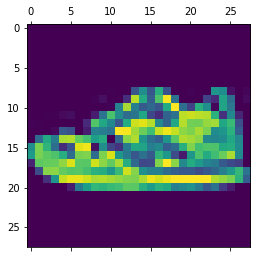

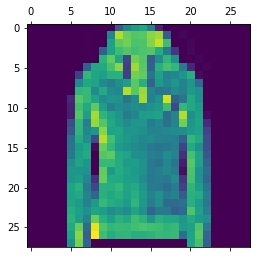

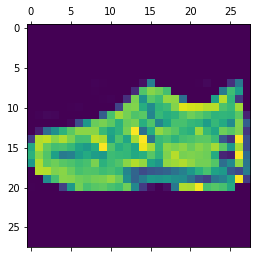

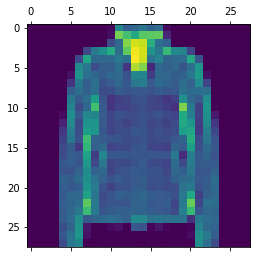

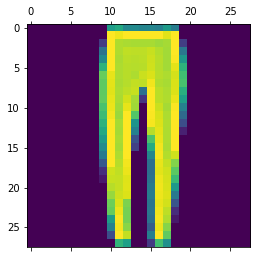

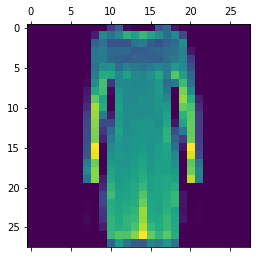

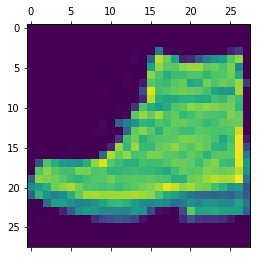

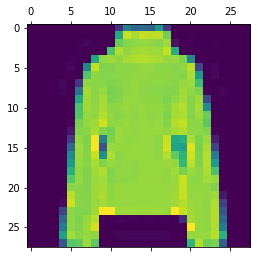

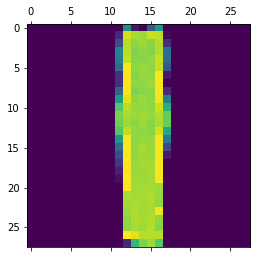

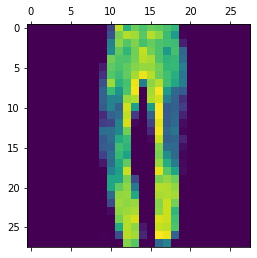

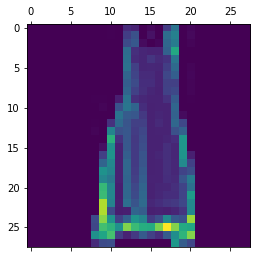

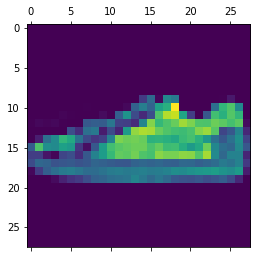

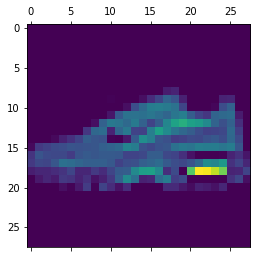

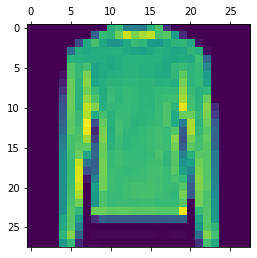

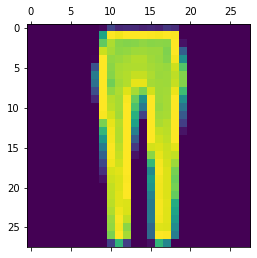

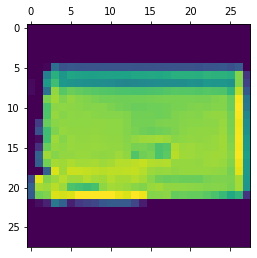

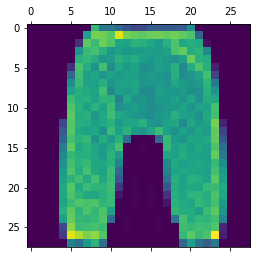

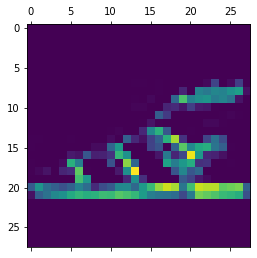

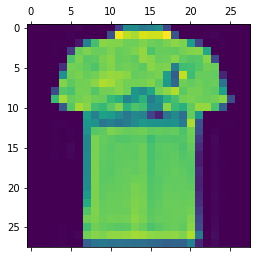

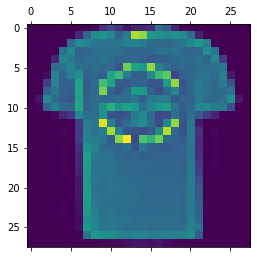

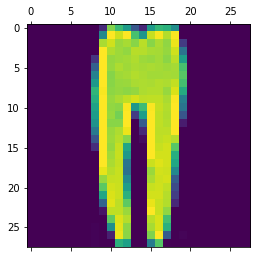

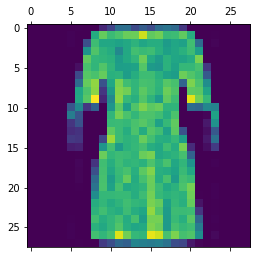

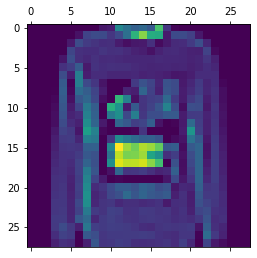

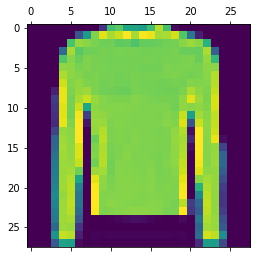

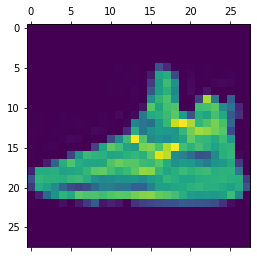

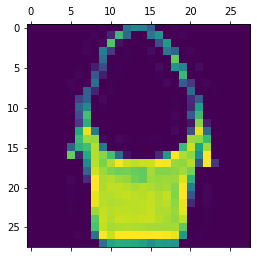

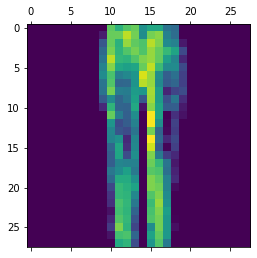

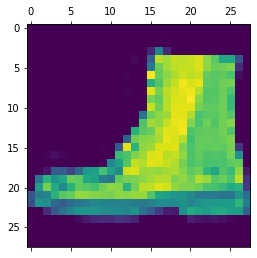

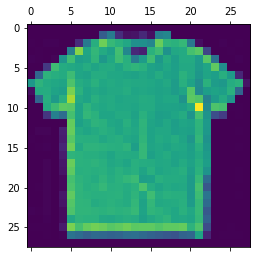

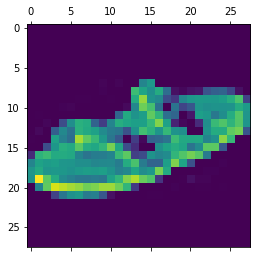

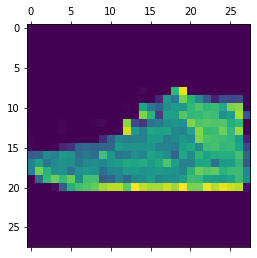

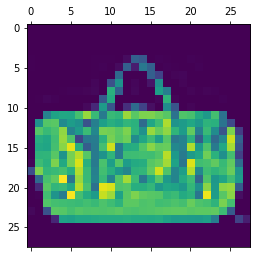

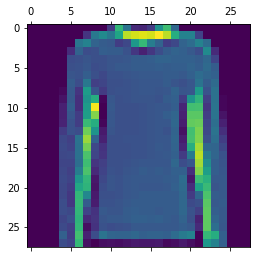

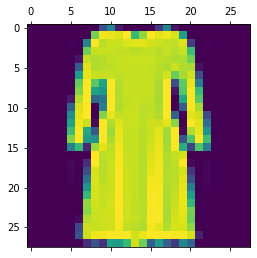

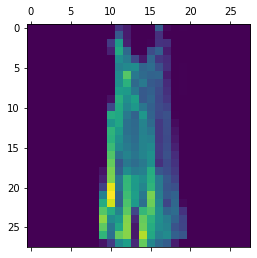

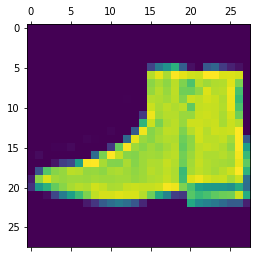

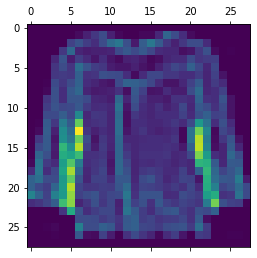

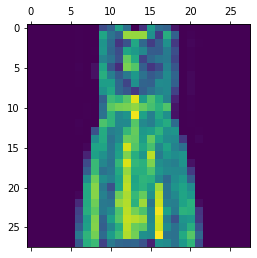

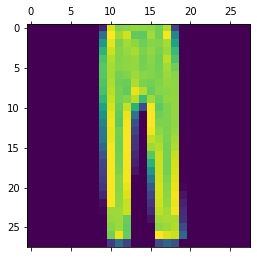

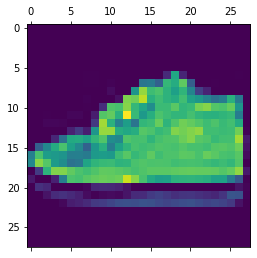

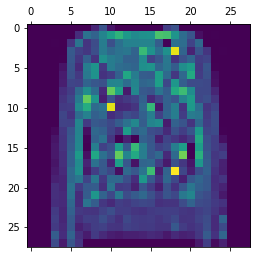

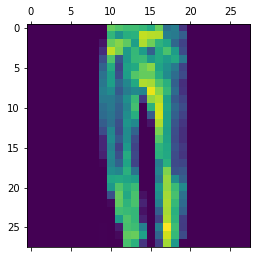

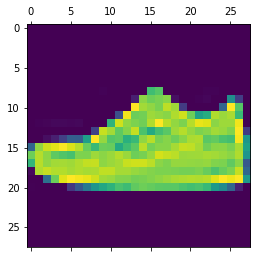

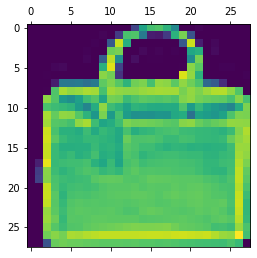

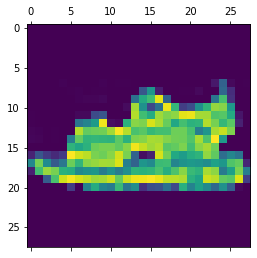

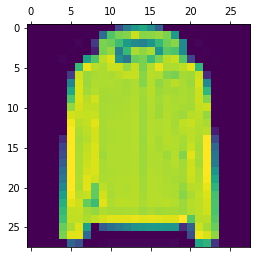

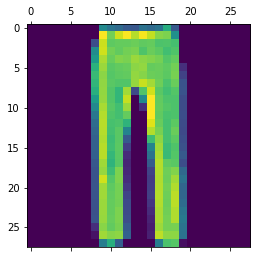

In [21]:
# 10 random elements from the test data
rand_id=np.random.randint(0,len(Xtest),50)
for i in rand_id:
    img=np.reshape(Xtest[i],(28,28))
    plt.matshow(img)

Do you see any issues in the data that may limit the generalization performance of your classifier?

In both the Xtrain and Xtest datasets, the number of elements with positive labels is smaller than the number of elements with negative labels. This causes data imbalance, and may affect generalisation.

(iii) Which performance metric (e.g., accuracy, AUC-ROC and AUC-PR) should be used for this
problem? Give the reasoning behind your choice(s).

The data is imbalanced. So, AUC-PR should be used.

Other metrics such as AUC-ROC and accuracy have an underlying assumption that the training data is balanced. So they should not be used.

(iv) What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.

In [22]:
labels=[-1,+1]
rand_labels=np.zeros(3000)
for i in range(len(rand_labels)):
    rand_labels[i]=random.choice(labels)

In [23]:
from sklearn.metrics import accuracy_score

# accuracy over train dataset
print("The accuracy of a random classifier over training dataset is ",accuracy_score(Ytrain,rand_labels))

The accuracy of a random classifier over training dataset is  0.49966666666666665


Accuracy over test dataset?

Since the test dataset also has a similar distribution of classes as the training data, the accuracy over it will be the same.

(iv) What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.

In [25]:
# Over training dataset
print("The AUC-ROC of a random classifier for this problem is ",sklearn.metrics.roc_auc_score(Ytrain, rand_labels))

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(Ytrain, rand_labels)
print("The AUC-PR of a random classifier for this problem is ",sklearn.metrics.average_precision_score(Ytrain, rand_labels))

The AUC-ROC of a random classifier for this problem is  0.5013133024452636
The AUC-PR of a random classifier for this problem is  0.20409444165509266


AUC-ROC and AUC-PR over test dataset, would be the same as that of the training set, since the test dataset also has a similar distribution of classes as the training data.

## Question 2

Perform 5-fold stratified cross-validation
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
over the training dataset using a k=3 nearest neighbour (kNN) classifier and answer the following questions:

(i) What is the accuracy, balanced accuracy, AUC-ROC and AUC-PR for each fold using this classifier? Show code to demonstrate the results. Calculate the average and standard deviation for each metric across all folds and show these in a single table. As the KNN classifier in sklearn does not support decision_function, be sure to understand and use the predict_proba function for AUC-ROC and AUC-PR calculations or plotting.

In [32]:
import sklearn
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle = True)
from sklearn.neighbors import KNeighborsClassifier
sknn = KNeighborsClassifier(n_neighbors=3)
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score

In [103]:
# find balanced average
# find mean and stdev for balanced average
# show everything in a table

Acc=[]
Balanced_Acc=[]
A_roc=[]
A_prc=[]
for i,(tr_idx, v_idx) in enumerate(skf.split(Xtrain, Ytrain)):
    # split into train and validation sets
    Xtr, Xv = Xtrain[tr_idx], Xtrain[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    sknn = KNeighborsClassifier(n_neighbors=3)
    sknn.fit(Xtr,ytr)
    # find accuracy on each fold
    predicted=sknn.predict(Xv)
    acc = sklearn.metrics.accuracy_score(yv, predicted)
    Acc.append(acc)
    print("Accuracy for fold: ",i,"is: ",acc)
    
    # find balanced accuracy on each fold
    predicted=sknn.predict(Xv)
    bal_acc = sklearn.metrics.balanced_accuracy_score(yv, predicted)
    Balanced_Acc.append(bal_acc)
    print("Balanced accuracy for fold: ",i,"is: ",bal_acc)
    
    # find AUC ROC
    z=sknn.predict_proba(Xv) # returns a numpy array with two columns for a binary classification, 
    # one each for the negative and positive class
    fpr,tpr,tt = roc_curve(yv, z[:,1])
    roc_auc = auc(fpr, tpr)
    A_roc.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    
    # find AUC PRC
    pr, tpr, tt=precision_recall_curve(yv, z[:,1])
    prc_auc=auc(pr,tpr)
    A_prc.append(prc_auc)
    print('Fold ',i, 'AUC PRC: ',prc_auc)  

print('Mean accuarcy',np.mean(Acc))
print('Mean balanced accuarcy',np.mean(Balanced_Acc))
print('Mean AUC ROC',np.mean(A_roc))
print('Mean AUC ROC',np.mean(A_roc))
print('Mean AUC PRC',np.mean(A_prc))
print('Stdev accuracy',np.std(Acc))
print('Stdev balanced accuracy',np.std(Balanced_Acc))
print('Stdev AUC ROC',np.std(A_roc))
print('Stdev AUC PRC',np.std(A_prc))

Accuracy for fold:  0 is:  0.8916666666666667
Balanced accuracy for fold:  0 is:  0.8404383016667809
Fold  0 AUC ROC: 0.8984841209959531
Fold  0 AUC PRC:  0.5865225556067002
Accuracy for fold:  1 is:  0.8683333333333333
Balanced accuracy for fold:  1 is:  0.7708519102819124
Fold  1 AUC ROC: 0.8759345634131284
Fold  1 AUC PRC:  0.5093685196192428
Accuracy for fold:  2 is:  0.8666666666666667
Balanced accuracy for fold:  2 is:  0.8064339117909322
Fold  2 AUC ROC: 0.8887783798614446
Fold  2 AUC PRC:  0.52149508469158
Accuracy for fold:  3 is:  0.86
Balanced accuracy for fold:  3 is:  0.786988133616846
Fold  3 AUC ROC: 0.8644025653336992
Fold  3 AUC PRC:  0.4790373147187056
Accuracy for fold:  4 is:  0.8833333333333333
Balanced accuracy for fold:  4 is:  0.8059518331032367
Fold  4 AUC ROC: 0.8813809207274463
Fold  4 AUC PRC:  0.5224988927342972
Mean accuarcy 0.874
Mean balanced accuarcy 0.8021328180919417
Mean AUC ROC 0.8817961100663343
Mean AUC ROC 0.8817961100663343
Mean AUC PRC 0.523784

In [108]:
print(tabulate([
    ['KNN', np.mean(Acc), np.std(Acc), np.mean(Balanced_Acc), np.std(Balanced_Acc),np.mean(A_roc), np.std(A_prc),
                np.mean(PR1), np.std(PR1)]],headers=['Classifier', 'Mean Accuracy', 'Stdev Accuracy','Mean Balanced Accuracy', 'Stdev Balanced Accuracy',
                       'Mean AUC ROC','Stdev AUC ROC','Mean AUC PRC','Stdev AUC PRC']))

Classifier      Mean Accuracy    Stdev Accuracy    Mean Balanced Accuracy    Stdev Balanced Accuracy    Mean AUC ROC    Stdev AUC ROC    Mean AUC PRC    Stdev AUC PRC
------------  ---------------  ----------------  ------------------------  -------------------------  --------------  ---------------  --------------  ---------------
KNN                     0.874         0.0116714                  0.802133                  0.0232734        0.881796        0.0350802        0.581442        0.0695086


(ii) Plot the ROC and PR curves for one fold. What are your observations about the ROC and PR curves?

In [30]:
def plotROC(y,z,pstr = ''):
    # Note: z is the decision function/ target score 
    fpr,tpr,tt = roc_curve(y, z)
    # tt: thresholds 
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(tt,fpr,'o-',tt,tpr,'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(fpr,tpr,'o-');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

def plotPRC(y,z,pstr = ''):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    plt.figure()
    plt.plot(tt,R[:-1],'o-',tt,P[:-1],'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

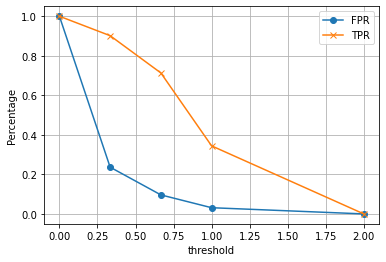

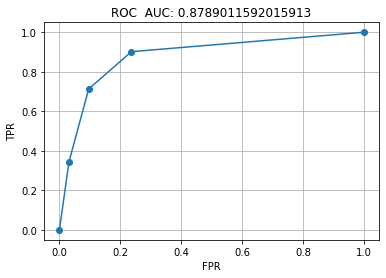

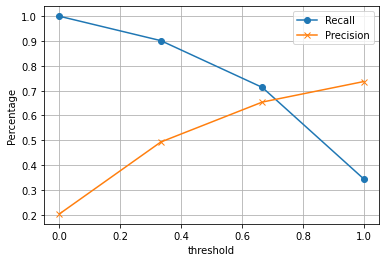

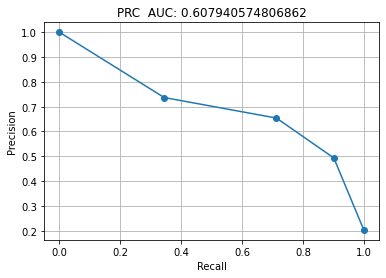

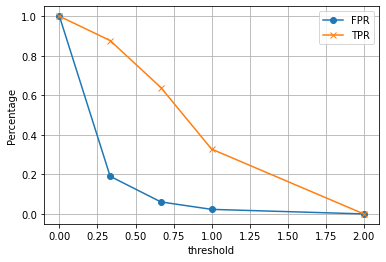

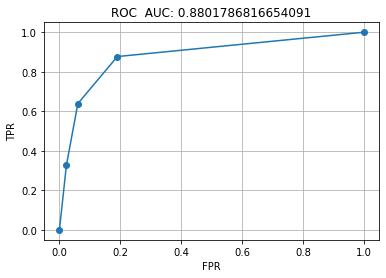

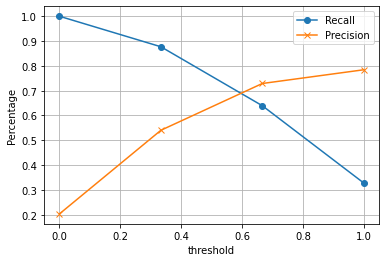

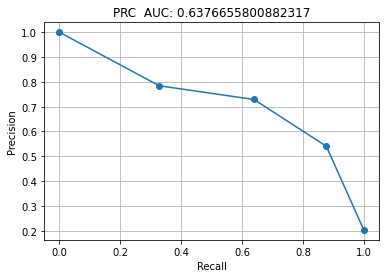

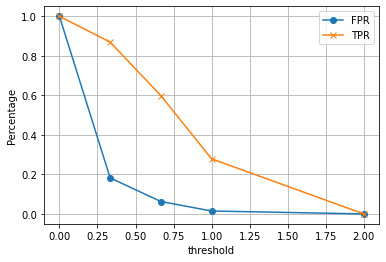

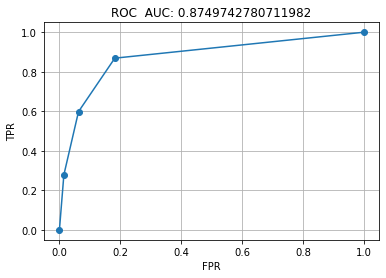

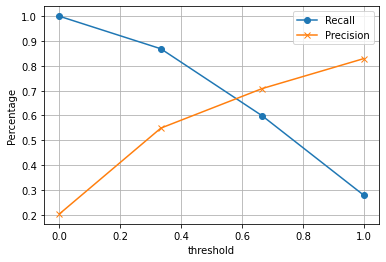

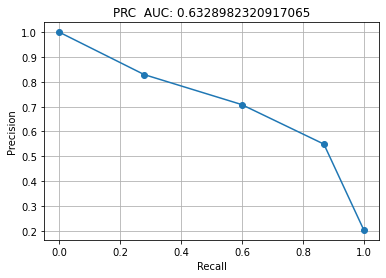

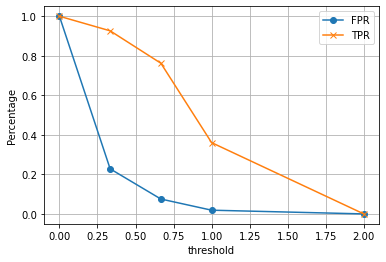

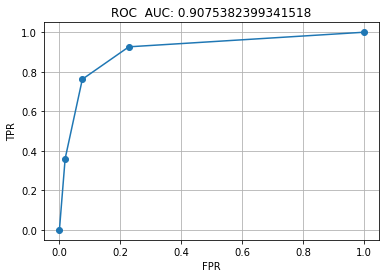

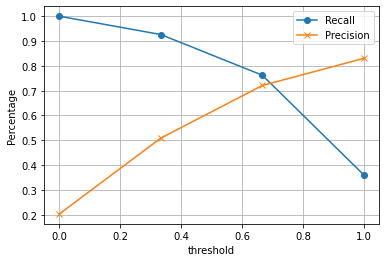

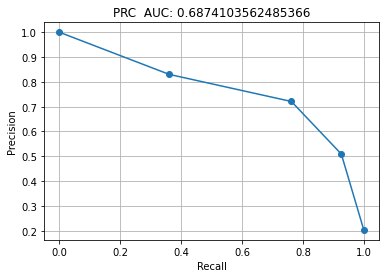

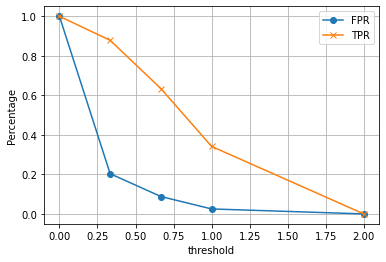

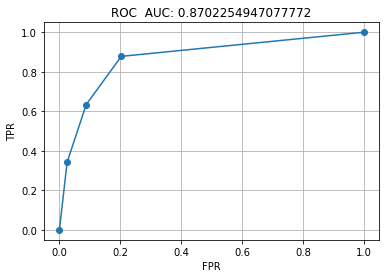

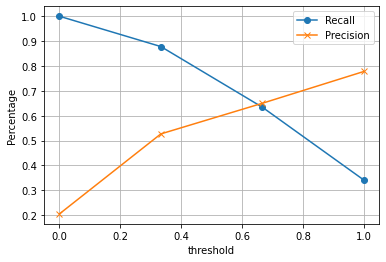

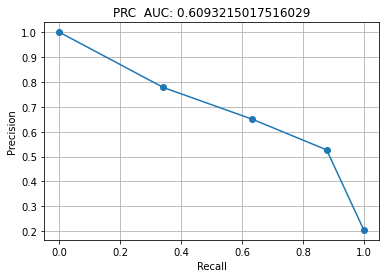

In [111]:
# plot roc and prc for 2nd fold(i=1)
for i,(tr_idx, v_idx) in enumerate(skf.split(Xtrain, Ytrain)):
    # split into train and validation sets
    Xtr, Xv = Xtrain[tr_idx], Xtrain[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    sknn = KNeighborsClassifier(n_neighbors=3)
    sknn.fit(Xtr,ytr)
    z=sknn.predict_proba(Xv)
    plotROC(yv,z[:,1])
    plotPRC(yv,z[:,1])

What are your observations about the ROC and PR curves?
Even though the ROC curves are almost optimal, the PR curves are not good as the data is imbalanced. So the classifier does not offer good separatability.

(iii) What is the impact of various forms of pre-processing (https://scikit-learn.org/stable/modules/preprocessing.html ) (e.g., mean-standard deviation or standard scaling or min-max scaling) on the cross-validation performance? Show code to demonstrate the results and write a summary of your findings. Do any pre-processing techniques improve predictive performance? Why do you think this is the case?

In [21]:
# standard scaling
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler().fit(Xtrain)
X_scaled = std_scaler.transform(Xtrain)

Acc=[]
Balanced_Acc=[]
A_roc=[]
A_prc=[]
for i,(tr_idx, v_idx) in enumerate(skf.split(X_scaled, Ytrain)):
    # split into train and validation sets
    Xtr, Xv = X_scaled[tr_idx], X_scaled[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    sknn = KNeighborsClassifier(n_neighbors=3)
    sknn.fit(Xtr,ytr)
    # find accuracy on each fold
    predicted=sknn.predict(Xv)
    acc = sklearn.metrics.accuracy_score(yv, predicted)
    Acc.append(acc)
    print("Accuracy for fold: ",i,"is: ",acc)
    
    # find balanced accuracy on each fold
    predicted=sknn.predict(Xv)
    bal_acc = sklearn.metrics.balanced_accuracy_score(yv, predicted)
    Balanced_Acc.append(bal_acc)
    print("Balanced accuracy for fold: ",i,"is: ",bal_acc)
    
    # find AUC ROC
    z=sknn.predict_proba(Xv) # returns a numpy array with two columns for a binary classification, 
    # one each for the negative and positive class
    fpr,tpr,tt = roc_curve(yv, z[:,1])
    roc_auc = auc(fpr, tpr)
    A_roc.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    
    # find AUC PRC
    pr, tpr, tt=precision_recall_curve(yv, z[:,1])
    prc_auc=auc(pr,tpr)
    A_prc.append(prc_auc)
    print('Fold ',i, 'AUC PRC: ',prc_auc)  

print('Mean accuarcy',np.mean(Acc))
print('Mean balanced accuarcy',np.mean(Balanced_Acc))
print('Mean AUC ROC',np.mean(A_roc))
print('Mean AUC ROC',np.mean(A_roc))
print('Mean AUC PRC',np.mean(A_prc))
print('Stdev accuracy',np.std(Acc))
print('Stdev balanced accuracy',np.std(Balanced_Acc))
print('Stdev AUC ROC',np.std(A_roc))
print('Stdev AUC PRC',np.std(A_prc))

Accuracy for fold:  0 is:  0.86
Balanced accuracy for fold:  0 is:  0.768674120310035
Fold  0 AUC ROC: 0.8707987516290555
Fold  0 AUC PRC:  0.4986220226748725
Accuracy for fold:  1 is:  0.8916666666666667
Balanced accuracy for fold:  1 is:  0.8404383016667809
Fold  1 AUC ROC: 0.9098532135263051
Fold  1 AUC PRC:  0.596636498203914
Accuracy for fold:  2 is:  0.8633333333333333
Balanced accuracy for fold:  2 is:  0.7890801838260512
Fold  2 AUC ROC: 0.9049403251251801
Fold  2 AUC PRC:  0.5419977281675968
Accuracy for fold:  3 is:  0.87
Balanced accuracy for fold:  3 is:  0.7780026064887853
Fold  3 AUC ROC: 0.8814905000342959
Fold  3 AUC PRC:  0.5267296268764273
Accuracy for fold:  4 is:  0.8616666666666667
Balanced accuracy for fold:  4 is:  0.7893081761006289
Fold  4 AUC ROC: 0.8788328134853676
Fold  4 AUC PRC:  0.5200738759779906
Mean accuarcy 0.8693333333333333
Mean balanced accuarcy 0.7931006776784562
Mean AUC ROC 0.8891831207600408
Mean AUC ROC 0.8891831207600408
Mean AUC PRC 0.536811

In [22]:
# minmax scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled_minmax = min_max_scaler.fit_transform(Xtrain)
Acc=[]
Balanced_Acc=[]
A_roc=[]
A_prc=[]
for i,(tr_idx, v_idx) in enumerate(skf.split(X_scaled_minmax, Ytrain)):
    # split into train and validation sets
    Xtr, Xv = X_scaled_minmax[tr_idx], X_scaled_minmax[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    sknn = KNeighborsClassifier(n_neighbors=3)
    sknn.fit(Xtr,ytr)
    # find accuracy on each fold
    predicted=sknn.predict(Xv)
    acc = sklearn.metrics.accuracy_score(yv, predicted)
    Acc.append(acc)
    print("Accuracy for fold: ",i,"is: ",acc)
    
    # find balanced accuracy on each fold
    predicted=sknn.predict(Xv)
    bal_acc = sklearn.metrics.balanced_accuracy_score(yv, predicted)
    Balanced_Acc.append(bal_acc)
    print("Balanced accuracy for fold: ",i,"is: ",bal_acc)
    
    # find AUC ROC
    z=sknn.predict_proba(Xv) # returns a numpy array with two columns for a binary classification, 
    # one each for the negative and positive class
    fpr,tpr,tt = roc_curve(yv, z[:,1])
    roc_auc = auc(fpr, tpr)
    A_roc.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    
    # find AUC PRC
    pr, tpr, tt=precision_recall_curve(yv, z[:,1])
    prc_auc=auc(pr,tpr)
    A_prc.append(prc_auc)
    print('Fold ',i, 'AUC PRC: ',prc_auc)  

print('Mean accuarcy',np.mean(Acc))
print('Mean balanced accuarcy',np.mean(Balanced_Acc))
print('Mean AUC ROC',np.mean(A_roc))
print('Mean AUC ROC',np.mean(A_roc))
print('Mean AUC PRC',np.mean(A_prc))
print('Stdev accuracy',np.std(Acc))
print('Stdev balanced accuracy',np.std(Balanced_Acc))
print('Stdev AUC ROC',np.std(A_roc))
print('Stdev AUC PRC',np.std(A_prc))

Accuracy for fold:  0 is:  0.8533333333333334
Balanced accuracy for fold:  0 is:  0.7919610398518417
Fold  0 AUC ROC: 0.8611015844708143
Fold  0 AUC PRC:  0.48259635982484034
Accuracy for fold:  1 is:  0.8716666666666667
Balanced accuracy for fold:  1 is:  0.8095719871047398
Fold  1 AUC ROC: 0.8841827285822073
Fold  1 AUC PRC:  0.5408466427120474
Accuracy for fold:  2 is:  0.8733333333333333
Balanced accuracy for fold:  2 is:  0.7984086700048014
Fold  2 AUC ROC: 0.8912819809314768
Fold  2 AUC PRC:  0.5310980946728365
Accuracy for fold:  3 is:  0.88
Balanced accuracy for fold:  3 is:  0.793435763769806
Fold  3 AUC ROC: 0.8901845119692708
Fold  3 AUC PRC:  0.5263708828395247
Accuracy for fold:  4 is:  0.8916666666666667
Balanced accuracy for fold:  4 is:  0.8081761006289307
Fold  4 AUC ROC: 0.9191167697840501
Fold  4 AUC PRC:  0.5708441830290946
Mean accuarcy 0.874
Mean balanced accuarcy 0.8003107122720239
Mean AUC ROC 0.8891735151475639
Mean AUC ROC 0.8891735151475639
Mean AUC PRC 0.530

In [23]:
# normalizer
Normalizer = preprocessing.Normalizer()
transformer = Normalizer.fit(Xtrain)
X_scaled_norm=transformer.transform(Xtrain)
Acc=[]
Balanced_Acc=[]
A_roc=[]
A_prc=[]
for i,(tr_idx, v_idx) in enumerate(skf.split(X_scaled_norm, Ytrain)):
    # split into train and validation sets
    Xtr, Xv = X_scaled_norm[tr_idx], X_scaled_norm[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    sknn = KNeighborsClassifier(n_neighbors=3)
    sknn.fit(Xtr,ytr)
    # find accuracy on each fold
    predicted=sknn.predict(Xv)
    acc = sklearn.metrics.accuracy_score(yv, predicted)
    Acc.append(acc)
    print("Accuracy for fold: ",i,"is: ",acc)
    
    # find balanced accuracy on each fold
    predicted=sknn.predict(Xv)
    bal_acc = sklearn.metrics.balanced_accuracy_score(yv, predicted)
    Balanced_Acc.append(bal_acc)
    print("Balanced accuracy for fold: ",i,"is: ",bal_acc)
    
    # find AUC ROC
    z=sknn.predict_proba(Xv) # returns a numpy array with two columns for a binary classification, 
    # one each for the negative and positive class
    fpr,tpr,tt = roc_curve(yv, z[:,1])
    roc_auc = auc(fpr, tpr)
    A_roc.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    
    # find AUC PRC
    pr, tpr, tt=precision_recall_curve(yv, z[:,1])
    prc_auc=auc(pr,tpr)
    A_prc.append(prc_auc)
    print('Fold ',i, 'AUC PRC: ',prc_auc)  

print('Mean accuarcy',np.mean(Acc))
print('Mean balanced accuarcy',np.mean(Balanced_Acc))
print('Mean AUC ROC',np.mean(A_roc))
print('Mean AUC ROC',np.mean(A_roc))
print('Mean AUC PRC',np.mean(A_prc))
print('Stdev accuracy',np.std(Acc))
print('Stdev balanced accuracy',np.std(Balanced_Acc))
print('Stdev AUC ROC',np.std(A_roc))
print('Stdev AUC PRC',np.std(A_prc))

Accuracy for fold:  0 is:  0.8766666666666667
Balanced accuracy for fold:  0 is:  0.8829137800946567
Fold  0 AUC ROC: 0.9303793127100624
Fold  0 AUC PRC:  0.5883639586908571
Accuracy for fold:  1 is:  0.8733333333333333
Balanced accuracy for fold:  1 is:  0.8380890321695589
Fold  1 AUC ROC: 0.9157521091981617
Fold  1 AUC PRC:  0.5546916438903889
Accuracy for fold:  2 is:  0.885
Balanced accuracy for fold:  2 is:  0.8454112079017766
Fold  2 AUC ROC: 0.920382056382468
Fold  2 AUC PRC:  0.5836289511098401
Accuracy for fold:  3 is:  0.86
Balanced accuracy for fold:  3 is:  0.832773166883874
Fold  3 AUC ROC: 0.9107106111530283
Fold  3 AUC PRC:  0.5547878078205947
Accuracy for fold:  4 is:  0.8816666666666667
Balanced accuracy for fold:  4 is:  0.8893746484634657
Fold  4 AUC ROC: 0.9365274155886212
Fold  4 AUC PRC:  0.5728154499494866
Mean accuarcy 0.8753333333333332
Mean balanced accuarcy 0.8577123671026665
Mean AUC ROC 0.9227503010064684
Mean AUC ROC 0.9227503010064684
Mean AUC PRC 0.57085

write a summary of your findings. Do any pre-processing techniques improve predictive performance.:
    
All the preprocessing methods improves the classification performance. As the AUC-PRC is higher in all cases.

## Question 3

Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: Perceptron, Naïve Bayes Classifier, Linear SVM and Kernelized SVM. Be sure to tune the hyperparameters of each classifier type (C and kernel type and kernel hyper-parameters for SVM etc). Report the cross validation results (mean and standard deviation of accuracy, balanced accuracy, AUC-ROC and AUC-PR across fold) of your best model. You may look into grid search as well as ways of pre-processing data.

In [29]:
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None or len(conts)<2:
            #conts = list(classes)
            vmin,vmax = classes[0]-eps,classes[-1]+eps
        else:            
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None or len(conts)<2:            
            conts = sorted([-1+eps,0,1-eps])
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 50)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

i. Write your strategy for selecting the optimal classifier. Show code to demonstrate the results for each classifier.

##### Strategy:
The classifiers to be compared are: Perceptron, Naive Bayes, Linear SVM and Kernelised svm(rbf, poly, sigmoid). 

The AUC-PRC will be the main metric which will be used to find the optimal classifier.

Stratified cross validation will be used in order to split the data into 5 folds, and calculate the metrics on each fold: accuracy, balanced accuracy, AUC-ROC, AUC-PRC. The mean and standard deviation of each will also be obtained.

In order to tune the hyperparameters for linear svm(C) and kernelised svm(C, kernel type, gamma), we use gridsearch. Since, the computation take a long time, gridsearch will be performed separately for each kernel type. The scoring of hyperparameters will be based on the 'average_precision' metric which gives the AUC-PRC. 

In [27]:
from sklearn.model_selection import StratifiedKFold

Accuracy for fold:  0 is:  0.8216666666666667
Balanced accuracy for fold:  0 is:  0.7140921873928253
Fold  0 AUC ROC: 0.8194835036696619
Fold  0 AUC PRC:  0.618084362989471
Accuracy for fold:  1 is:  0.8016666666666666
Balanced accuracy for fold:  1 is:  0.8114239659784621
Fold  1 AUC ROC: 0.8730194114822689
Fold  1 AUC PRC:  0.6711650068465818
Accuracy for fold:  2 is:  0.74
Balanced accuracy for fold:  2 is:  0.7666163660058989
Fold  2 AUC ROC: 0.8368029357294737
Fold  2 AUC PRC:  0.5824784402180908
Accuracy for fold:  3 is:  0.755
Balanced accuracy for fold:  3 is:  0.7394025653336992
Fold  3 AUC ROC: 0.8169456066945606
Fold  3 AUC PRC:  0.5753927241550847
Accuracy for fold:  4 is:  0.785
Balanced accuracy for fold:  4 is:  0.6204172419082682
Fold  4 AUC ROC: 0.7295427042320738
Fold  4 AUC PRC:  0.46008854572272706
Mean accuarcy 0.7806666666666666
Mean balanced accuarcy 0.7303904653238307
Mean AUC ROC 0.8151588323616078
Mean AUC PRC 0.581441815986391
Stdev accuracy 0.029844039047465

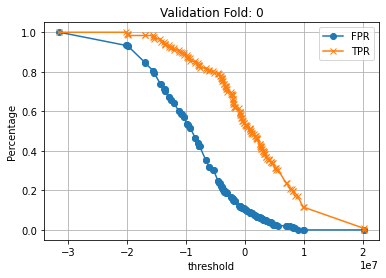

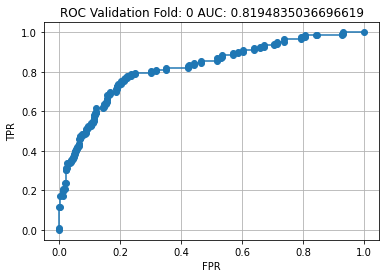

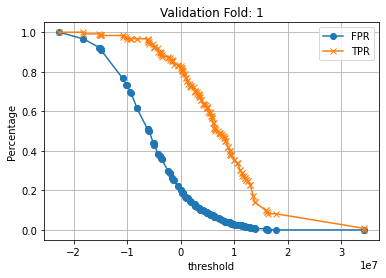

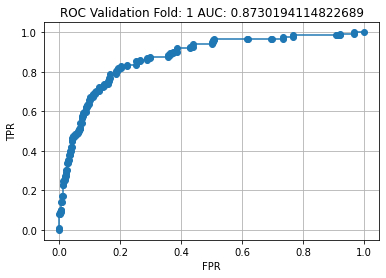

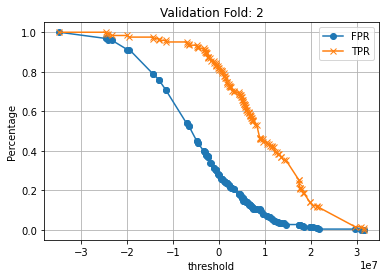

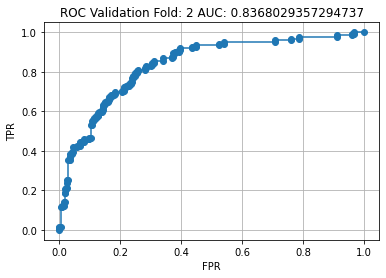

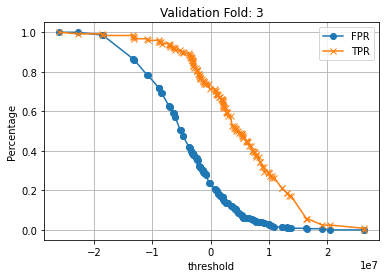

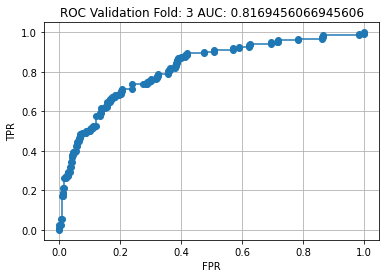

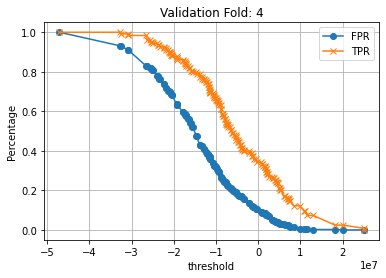

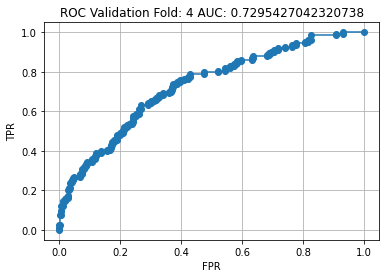

In [36]:
# perceptron
from sklearn.linear_model import Perceptron

skf = StratifiedKFold(n_splits=5,shuffle = True)
A1 = []
Balanced_Acc1=[]
ROC1=[]
PR1=[]

for i,(tr_idx, v_idx) in enumerate(skf.split(Xtrain, Ytrain)):
    Xtr, Xv = Xtrain[tr_idx], Xtrain[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    
    clf = Perceptron()
    clf.fit(Xtr,ytr)
    
    # find accuracy on each fold
    predicted=clf.predict(Xv)
    acc = sklearn.metrics.accuracy_score(yv, predicted)
    A1.append(acc)
    print("Accuracy for fold: ",i,"is: ",acc)
    
    # find balanced accuracy on each fold
    predicted=clf.predict(Xv)
    bal_acc = sklearn.metrics.balanced_accuracy_score(yv, predicted)
    Balanced_Acc1.append(bal_acc)
    print("Balanced accuracy for fold: ",i,"is: ",bal_acc)
    
    # find auc-roc on each fold
    z = clf.decision_function(Xv)
    roc_auc = plotROC(yv,z,pstr = 'Validation Fold: '+str(i))
    ROC1.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    
    # find AUC PRC
    pr, tpr, tt=precision_recall_curve(yv, z)
    # prc_auc=auc(pr,tpr)
    prc_auc=average_precision_score(yv,z)
    PR1.append(prc_auc)
    print('Fold ',i, 'AUC PRC: ',prc_auc)  

print('Mean accuarcy',np.mean(A1))
print('Mean balanced accuarcy',np.mean(Balanced_Acc1))
print('Mean AUC ROC',np.mean(ROC1))
print('Mean AUC PRC',np.mean(PR1))
print('Stdev accuracy',np.std(A1))
print('Stdev balanced accuracy',np.std(Balanced_Acc1))
print('Stdev AUC ROC',np.std(ROC1))
print('Stdev AUC PRC',np.std(PR1))

In [37]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=5,shuffle = True)
A2=[]
Balanced_Acc2=[]
ROC2=[]
PR2=[]
for i,(tr_idx, v_idx) in enumerate(skf.split(Xtrain, Ytrain)):
    # split into train and validation sets
    Xtr, Xv = Xtrain[tr_idx], Xtrain[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    
    clf = GaussianNB()
    clf.fit(Xtr,ytr)
    
    # find accuracy on each fold
    predicted=clf.predict(Xv)
    acc = sklearn.metrics.accuracy_score(yv, predicted)
    A2.append(acc)
    print("Accuracy for fold: ",i,"is: ",acc)
    
    # find balanced accuracy
    bal_acc = sklearn.metrics.balanced_accuracy_score(yv, predicted)
    Balanced_Acc2.append(bal_acc)
    print("Balanced accuracy for fold: ",i,"is: ",bal_acc)
    
    # find AUC ROC
    z=clf.predict_proba(Xv) # returns a numpy array with two columns for a binary classification, 
    # one each for the negative and positive class
    fpr,tpr,tt = roc_curve(yv, z[:,1])
    roc_auc = auc(fpr, tpr)
    ROC2.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    
    # find AUC PRC
    pr, tpr, tt=precision_recall_curve(yv, z[:,1])
    # prc_auc=auc(pr,tpr)
    prc_auc=average_precision_score(yv,z[:,1])
    PR2.append(prc_auc)
    print('Fold ',i, 'AUC PRC: ',prc_auc)  
    

print('Mean Accuracy',np.mean(A2))
print('Mean Balanced Accuracy',np.mean(Balanced_Acc2))
print('Mean AUC ROC',np.mean(ROC2))
print('Mean AUC PRC',np.mean(PR2))
print('Stdev Accuracy',np.std(A2))
print('Stdev Balanced Accuracy',np.std(Balanced_Acc2))
print('Stdev AUC ROC',np.std(ROC2))
print('Stdev AUC PRC',np.std(PR2))

Accuracy for fold:  0 is:  0.7666666666666667
Balanced accuracy for fold:  0 is:  0.7528294121681871
Fold  0 AUC ROC: 0.784818917621236
Fold  0 AUC PRC:  0.4389671015363636
Accuracy for fold:  1 is:  0.7633333333333333
Balanced accuracy for fold:  1 is:  0.7598943686123877
Fold  1 AUC ROC: 0.8057994375471569
Fold  1 AUC PRC:  0.46555477722165667
Accuracy for fold:  2 is:  0.7483333333333333
Balanced accuracy for fold:  2 is:  0.7413231360175595
Fold  2 AUC ROC: 0.7683997530694835
Fold  2 AUC PRC:  0.40250260228859996
Accuracy for fold:  3 is:  0.7283333333333334
Balanced accuracy for fold:  3 is:  0.7409801769668701
Fold  3 AUC ROC: 0.7637183620275738
Fold  3 AUC PRC:  0.4063425049073871
Accuracy for fold:  4 is:  0.7616666666666667
Balanced accuracy for fold:  4 is:  0.744516030065961
Fold  4 AUC ROC: 0.7809309539636277
Fold  4 AUC PRC:  0.4314532870974443
Mean Accuracy 0.7536666666666667
Mean Balanced Accuracy 0.747908624766193
Mean AUC ROC 0.7807334848458156
Mean AUC PRC 0.428964054

In [3]:
# tune hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [6]:
import pandas as pd
# Grid search for linear svm
parameters = {'kernel':['linear'], 'C':[0.1, 1, 10, 100, 1000]}
svc = SVC()
clf_linear = GridSearchCV(svc, parameters, scoring='average_precision')
clf_linear.fit(Xtrain, Ytrain)
results_linear = pd.DataFrame(clf_linear.cv_results_)
results_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.066262,0.263241,0.074735,0.006261,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.457766,0.555156,0.456274,0.461112,0.499826,0.486027,0.038142,1
1,2.117212,0.254635,0.073934,0.020064,1,linear,"{'C': 1, 'kernel': 'linear'}",0.457766,0.555156,0.456274,0.461112,0.499826,0.486027,0.038142,1
2,2.168295,0.242111,0.068204,0.007743,10,linear,"{'C': 10, 'kernel': 'linear'}",0.457766,0.555156,0.456274,0.461112,0.499826,0.486027,0.038142,1
3,2.189494,0.310830,0.077629,0.010315,100,linear,"{'C': 100, 'kernel': 'linear'}",0.457766,0.555156,0.456274,0.461112,0.499826,0.486027,0.038142,1
4,2.093782,0.179253,0.073347,0.008990,1000,linear,"{'C': 1000, 'kernel': 'linear'}",0.457766,0.555156,0.456274,0.461112,0.499826,0.486027,0.038142,1


In [7]:
print(clf_linear.best_estimator_)
print(clf_linear.best_score_)

SVC(C=0.1, kernel='linear')
0.4860268478911237


In [8]:
# Grid search for kernelised svm, kernel=rbf
parameters = {'kernel':['rbf'], 'C':[0.1, 1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
svc = SVC()
clf_rbf = GridSearchCV(svc, parameters, scoring='average_precision')
clf_rbf.fit(Xtrain, Ytrain)
results_rbf = pd.DataFrame(clf_rbf.cv_results_)
results_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.292651,0.111142,0.906974,0.043102,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1
1,2.196216,0.164203,0.881431,0.057778,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1
2,2.166703,0.040403,0.913385,0.049743,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1
3,2.071067,0.164762,0.850442,0.008620,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1
4,2.112091,0.084478,0.888477,0.042820,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1
5,2.162340,0.074328,0.904884,0.023450,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1
6,2.223547,0.101857,0.921696,0.041702,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1
7,1.968511,0.148124,0.901893,0.066223,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1
8,2.035712,0.072803,0.899293,0.041950,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1
9,2.055228,0.022368,0.925398,0.138692,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,1


In [9]:
print(clf_rbf.best_estimator_)
print(clf_rbf.best_score_)

SVC(C=0.1, gamma=1)
0.22379532397533194


In [14]:
# Grid search for kernelised svm, kernel=rbf
parameters = {'kernel':['rbf'], 'C':[0.1, 1, 10, 100, 1000],'gamma':[1, 'scale']}
svc = SVC()
clf_rbf = GridSearchCV(svc, parameters, scoring='average_precision')
clf_rbf.fit(Xtrain, Ytrain)
results_rbf = pd.DataFrame(clf_rbf.cv_results_)
results_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.063972,0.152032,0.871527,0.033603,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
1,0.951057,0.064162,0.335385,0.014277,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.655112,0.755805,0.736977,0.672086,0.630107,0.690017,0.048296,5
2,1.905781,0.059854,0.866880,0.064117,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
3,0.857121,0.023234,0.295269,0.008376,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.696263,0.814423,0.791339,0.729290,0.702422,0.746747,0.047721,1
4,2.329546,0.056758,0.881395,0.020183,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
5,1.029486,0.068877,0.366741,0.022421,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.696643,0.795212,0.750090,0.739364,0.742020,0.744666,0.031387,2
6,2.234150,0.122327,0.853141,0.033375,100,1,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
7,0.979007,0.031130,0.346060,0.005814,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.692797,0.786500,0.749134,0.736675,0.738698,0.740761,0.029946,3
8,2.290167,0.093979,0.866318,0.011624,1000,1,rbf,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
9,1.036684,0.049337,0.354057,0.012365,1000,scale,rbf,"{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}",0.692797,0.786500,0.749134,0.736675,0.738698,0.740761,0.029946,3


In [15]:
print(clf_rbf.best_estimator_)
print(clf_rbf.best_score_)

SVC(C=1)
0.7467472629666932


In [10]:
# Grid search for kernelised svm, kernel=poly
parameters = {'kernel':['poly'], 'C':[0.1, 1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
svc = SVC()
clf_poly = GridSearchCV(svc, parameters, scoring='average_precision')
clf_poly.fit(Xtrain, Ytrain)
results_poly = pd.DataFrame(clf_poly.cv_results_)
results_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.855608,0.056444,0.100355,0.011354,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.589818,0.663668,0.611944,0.712295,0.610484,0.637642,0.044577,16
1,0.855979,0.060331,0.119277,0.024183,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.589818,0.663668,0.611944,0.712295,0.610484,0.637642,0.044577,16
2,0.807030,0.028979,0.103520,0.012776,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.589810,0.663668,0.611929,0.712361,0.610484,0.637650,0.044602,1
3,0.740459,0.023388,0.096850,0.006247,0.1,0.001,poly,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}",0.589818,0.663668,0.611944,0.712361,0.610429,0.637644,0.044605,11
4,0.797490,0.047684,0.126311,0.032228,0.1,0.0001,poly,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}",0.589811,0.663668,0.611929,0.712361,0.610453,0.637644,0.044606,6
5,1.060645,0.113515,0.170153,0.035406,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.589818,0.663668,0.611944,0.712295,0.610484,0.637642,0.044577,16
6,1.071085,0.159066,0.146595,0.030587,1,0.1,poly,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}",0.589818,0.663668,0.611944,0.712295,0.610484,0.637642,0.044577,16
7,0.906828,0.097633,0.124782,0.028066,1,0.01,poly,"{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}",0.589810,0.663668,0.611929,0.712361,0.610484,0.637650,0.044602,1
8,0.856531,0.030254,0.122068,0.013103,1,0.001,poly,"{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}",0.589818,0.663668,0.611944,0.712361,0.610429,0.637644,0.044605,11
9,0.842619,0.026527,0.115834,0.009086,1,0.0001,poly,"{'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}",0.589811,0.663668,0.611929,0.712361,0.610453,0.637644,0.044606,6


In [11]:
print(clf_poly.best_estimator_)
print(clf_poly.best_score_)

SVC(C=0.1, gamma=0.01, kernel='poly')
0.6376503891026308


In [12]:
# Grid search for kernelised svm, kernel=sigmoid
parameters = {'kernel':['sigmoid'], 'C':[0.1, 1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
svc = SVC()
clf_sig = GridSearchCV(svc, parameters, scoring='average_precision')
clf_sig.fit(Xtrain, Ytrain)
results_sig = pd.DataFrame(clf_sig.cv_results_)
results_sig

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.875044,0.039159,0.159991,0.013657,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1
1,0.830646,0.053192,0.178648,0.026140,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1
2,0.813157,0.018418,0.145233,0.013231,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1
3,0.818788,0.072544,0.153607,0.019444,0.1,0.001,sigmoid,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1
4,0.853369,0.098552,0.159117,0.034291,0.1,0.0001,sigmoid,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1
5,0.827142,0.051106,0.153617,0.018275,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1
6,0.870174,0.044793,0.153179,0.007575,1,0.1,sigmoid,"{'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1
7,0.841981,0.035073,0.172217,0.025629,1,0.01,sigmoid,"{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1
8,0.821440,0.028747,0.156521,0.009990,1,0.001,sigmoid,"{'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1
9,0.855449,0.034866,0.154615,0.014513,1,0.0001,sigmoid,"{'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}",0.203333,0.203333,0.203333,0.203333,0.205,0.203667,0.000667,1


In [13]:
print(clf_sig.best_estimator_)
print(clf_sig.best_score_)

SVC(C=0.1, gamma=1, kernel='sigmoid')
0.20366666666666666


Accuracy for fold:  0 is:  0.8633333333333333
Balanced accuracy for fold:  0 is:  0.7768708416215104
Fold  0 AUC ROC: 0.9273269771589272
Fold  0 AUC PRC:  0.6989498683855748
Accuracy for fold:  1 is:  0.875
Balanced accuracy for fold:  1 is:  0.7872453529048632
Fold  1 AUC ROC: 0.9100932848617875
Fold  1 AUC PRC:  0.7325571845859159
Accuracy for fold:  2 is:  0.8533333333333334
Balanced accuracy for fold:  2 is:  0.7675423554427602
Fold  2 AUC ROC: 0.9180499348377803
Fold  2 AUC PRC:  0.7035082211632593
Accuracy for fold:  3 is:  0.8666666666666667
Balanced accuracy for fold:  3 is:  0.7331778585636874
Fold  3 AUC ROC: 0.9294190273681322
Fold  3 AUC PRC:  0.7798657136764113
Accuracy for fold:  4 is:  0.8666666666666667
Balanced accuracy for fold:  4 is:  0.7653014265991717
Fold  4 AUC ROC: 0.9122564810553765
Fold  4 AUC PRC:  0.7509985877704767
Mean Accuracy 0.865
Mean Balanced Accuracy 0.7660275670263986
Mean AUC ROC 0.9194291410564007
Mean AUC PRC 0.7331759151163275
Stdev Accuracy 0.

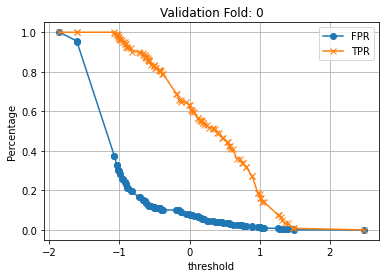

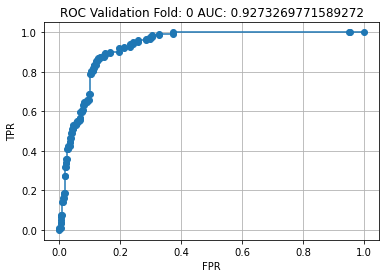

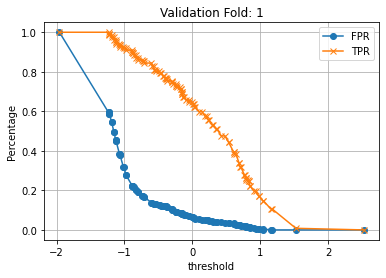

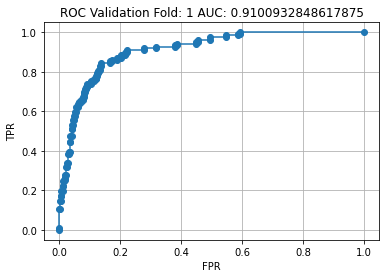

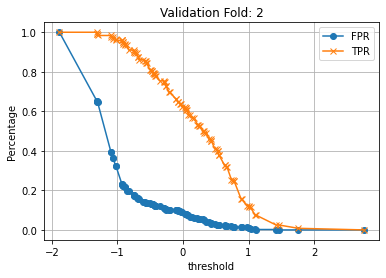

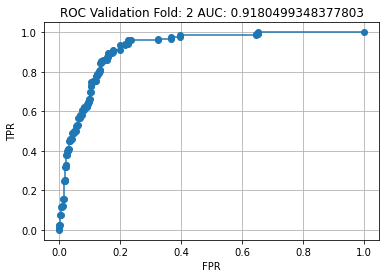

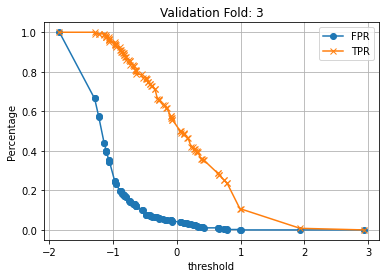

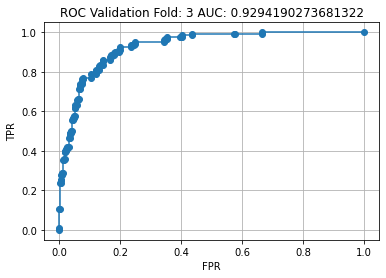

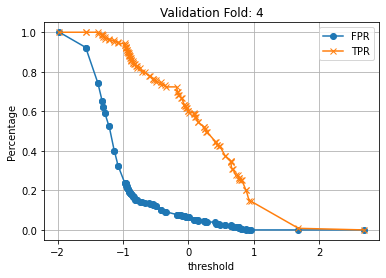

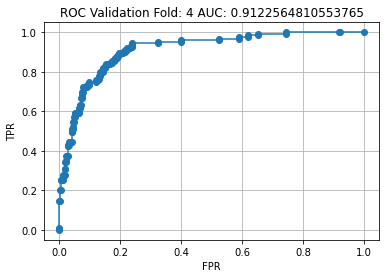

In [33]:
# choose rbf with C=1 default gamma='scale' out of svms.

skf = StratifiedKFold(n_splits=5,shuffle = True)
A3 = []
Balanced_Acc3=[]
ROC3=[]
PR3=[]
for i,(tr_idx, v_idx) in enumerate(skf.split(Xtrain, Ytrain)):
    Xtr, Xv = Xtrain[tr_idx], Xtrain[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    # or kernel='rbf'
    clf = SVC(C=1, kernel='rbf') #degree, coef0, gamma='scale',, class_weight=None  
    clf.fit(Xtr,ytr)
    z = clf.decision_function(Xv)
    
    # find accuracy on each fold
    predicted=clf.predict(Xv)
    acc = sklearn.metrics.accuracy_score(yv, predicted)
    A3.append(acc)
    print("Accuracy for fold: ",i,"is: ",acc)
    
    # find balanced accuracy on each fold
    predicted=clf.predict(Xv)
    bal_acc = sklearn.metrics.balanced_accuracy_score(yv, predicted)
    Balanced_Acc3.append(bal_acc)
    print("Balanced accuracy for fold: ",i,"is: ",bal_acc)
    
    # find auc-roc on each fold
    z = clf.decision_function(Xv)
    roc_auc = plotROC(yv,z,pstr = 'Validation Fold: '+str(i))
    ROC3.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    
    # find AUC PRC
    pr, tpr, tt=precision_recall_curve(yv, z)
    # prc_auc=auc(pr,tpr)
    prc_auc=average_precision_score(yv,z)
    PR3.append(prc_auc)
    print('Fold ',i, 'AUC PRC: ',prc_auc) 
    
print('Mean Accuracy',np.mean(A3))
print('Mean Balanced Accuracy',np.mean(Balanced_Acc3))
print('Mean AUC ROC',np.mean(ROC3))
print('Mean AUC PRC',np.mean(PR3))
print('Stdev Accuracy',np.std(A3))
print('Stdev Balanced Accuracy',np.std(Balanced_Acc3))
print('Stdev AUC ROC',np.std(ROC3))
print('Stdev AUC PRC',np.std(PR3))

Accuracy for fold:  0 is:  0.7783333333333333
Balanced accuracy for fold:  0 is:  0.6655291858152137
Fold  0 AUC ROC: 0.7490911585156732
Fold  0 AUC PRC:  0.41608426319720865
Accuracy for fold:  1 is:  0.7733333333333333
Balanced accuracy for fold:  1 is:  0.6929144660127581
Fold  1 AUC ROC: 0.7614891281980931
Fold  1 AUC PRC:  0.4601021882981967
Accuracy for fold:  2 is:  0.77
Balanced accuracy for fold:  2 is:  0.6755607380478771
Fold  2 AUC ROC: 0.7645757596542974
Fold  2 AUC PRC:  0.48944841116296617
Accuracy for fold:  3 is:  0.7733333333333333
Balanced accuracy for fold:  3 is:  0.6746004527059469
Fold  3 AUC ROC: 0.7487996433225872
Fold  3 AUC PRC:  0.4685766148251814
Accuracy for fold:  4 is:  0.7683333333333333
Balanced accuracy for fold:  4 is:  0.6793219818990643
Fold  4 AUC ROC: 0.750166180907092
Fold  4 AUC PRC:  0.4714715825832156
Mean Accuracy 0.7726666666666666
Mean Balanced Accuracy 0.6775853648961719
Mean AUC ROC 0.7548243741195486
Mean AUC PRC 0.4611366120133537
Stde

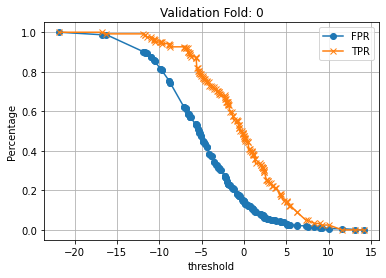

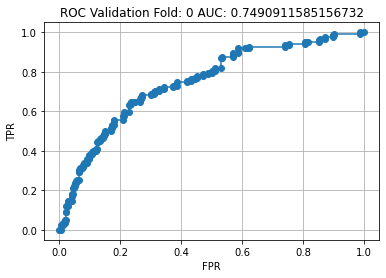

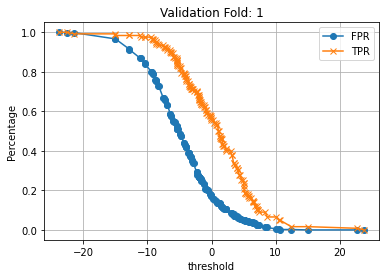

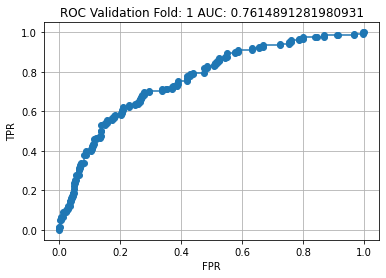

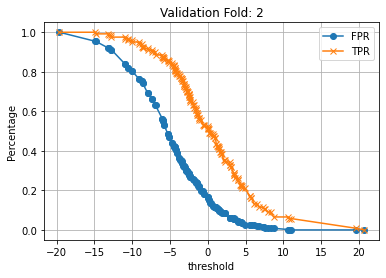

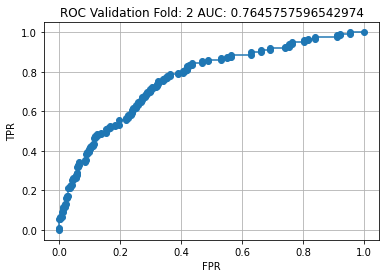

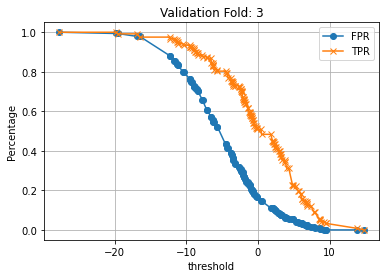

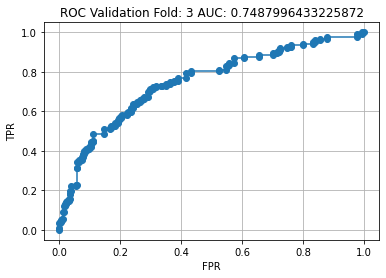

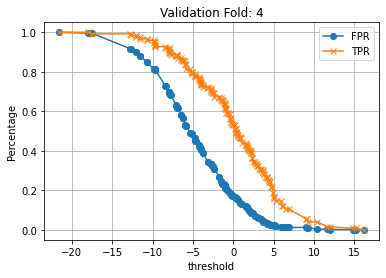

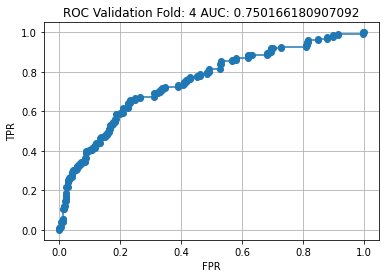

In [40]:
# linear svm
# tune the hyperparameters

from sklearn.svm import SVC

skf = StratifiedKFold(n_splits=5,shuffle = True)
A4 = []
Balanced_Acc4=[]
ROC4=[]
PR4=[]

for i,(tr_idx, v_idx) in enumerate(skf.split(Xtrain, Ytrain)):
    Xtr, Xv = Xtrain[tr_idx], Xtrain[v_idx]
    ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
    clf = SVC(C=0.1, kernel='linear',gamma = 1.0) #degree, coef0, gamma='scale',, class_weight=None  
    clf.fit(Xtr,ytr)
    z = clf.decision_function(Xv)
    
    # find accuracy on each fold
    predicted=clf.predict(Xv)
    acc = sklearn.metrics.accuracy_score(yv, predicted)
    A4.append(acc)
    print("Accuracy for fold: ",i,"is: ",acc)
    
    # find balanced accuracy on each fold
    predicted=clf.predict(Xv)
    bal_acc = sklearn.metrics.balanced_accuracy_score(yv, predicted)
    Balanced_Acc4.append(bal_acc)
    print("Balanced accuracy for fold: ",i,"is: ",bal_acc)
    
    # find auc-roc on each fold
    z = clf.decision_function(Xv)
    roc_auc = plotROC(yv,z,pstr = 'Validation Fold: '+str(i))
    ROC4.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    
    # find AUC PRC
    pr, tpr, tt=precision_recall_curve(yv, z)
    # prc_auc=auc(pr,tpr)
    prc_auc=average_precision_score(yv,z)
    PR4.append(prc_auc)
    print('Fold ',i, 'AUC PRC: ',prc_auc) 
    
print('Mean Accuracy',np.mean(A4))
print('Mean Balanced Accuracy',np.mean(Balanced_Acc4))
print('Mean AUC ROC',np.mean(ROC4))
print('Mean AUC PRC',np.mean(PR4))
print('Stdev Accuracy',np.std(A4))
print('Stdev Balanced Accuracy',np.std(Balanced_Acc4))
print('Stdev AUC ROC',np.std(ROC4))
print('Stdev AUC PRC',np.std(PR4))

ii. Show the comparison of these classifiers using a single consolidated table.

In [41]:
from tabulate import tabulate
# comparison of these classifiers using a single consolidated table
print(tabulate([['Perceptron', np.mean(A1), np.std(A1), np.mean(Balanced_Acc1), np.std(Balanced_Acc1),np.mean(ROC1), np.std(ROC1),
                np.mean(PR1), np.std(PR1)], 
                ['Naive Bayes', np.mean(A2), np.std(A2), np.mean(Balanced_Acc2), np.std(Balanced_Acc2),np.mean(ROC2), np.std(ROC2),
                np.mean(PR2), np.std(PR2)],
                ['Kernelised svm', np.mean(A3), np.std(A3), np.mean(Balanced_Acc3), np.std(Balanced_Acc3),np.mean(ROC3), np.std(ROC3),
                np.mean(PR3), np.std(PR3)],
                ['Linear svm',np.mean(A4), np.std(A4), np.mean(Balanced_Acc4), np.std(Balanced_Acc4),np.mean(ROC4), np.std(ROC4),
                np.mean(PR4), np.std(PR4)]], 
               headers=['Classifier', 'Mean Accuracy', 'Stdev Accuracy','Mean Balanced Accuracy', 'Stdev Balanced Accuracy',
                       'Mean AUC ROC','Stdev AUC ROC','Mean AUC PRC','Stdev AUC PRC']))

Classifier        Mean Accuracy    Stdev Accuracy    Mean Balanced Accuracy    Stdev Balanced Accuracy    Mean AUC ROC    Stdev AUC ROC    Mean AUC PRC    Stdev AUC PRC
--------------  ---------------  ----------------  ------------------------  -------------------------  --------------  ---------------  --------------  ---------------
Perceptron             0.780667        0.029844                    0.73039                  0.063749          0.815159       0.0472617         0.581442        0.0695086
Naive Bayes            0.753667        0.0141185                   0.747909                 0.00735872        0.780733       0.0147422         0.428964        0.0230525
Kernelised svm         0.865           0.00699206                  0.766028                 0.0181642         0.919429       0.0077805         0.733176        0.0301648
Linear svm             0.772667        0.00343188                  0.677585                 0.00890345        0.754824       0.00678785        0.461137    

iii. Plot the ROC curves of all classifiers on the same axes for easy comparison.

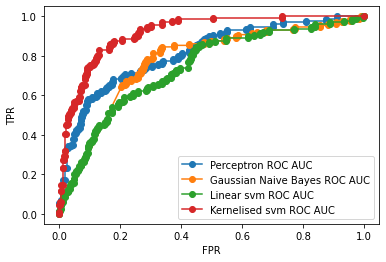

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split

Xtr, Xv, ytr, yv = train_test_split(Xtrain, Ytrain, test_size=0.2, shuffle = True, stratify = None)
# perceptron

clf1 = Perceptron()
clf1.fit(Xtr,ytr)
    
predicted1=clf1.predict(Xv)
    
# find auc-roc
z1 = clf1.decision_function(Xv)
fpr1,tpr1,tt1 = roc_curve(yv, z1)

plt.plot(fpr1,tpr1,'o-',label='Perceptron ROC AUC');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid()

# find AUC PRC
pr1, tpr1, tt1=precision_recall_curve(yv, z1)
# prc_auc=auc(pr,tpr)
prc_auc1=average_precision_score(yv,z1)

# nb classifier
clf2 = GaussianNB()
clf2.fit(Xtr,ytr)
    
predicted2=clf2.predict(Xv)
    
# find AUC ROC
z2=clf2.predict_proba(Xv) # returns a numpy array with two columns for a binary classification, 
# one each for the negative and positive class
fpr2,tpr2,tt2 = roc_curve(yv, z2[:,1])

plt.plot(fpr2,tpr2,'o-',label='Gaussian Naive Bayes ROC AUC');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid()

# find AUC PRC
pr2, tpr2, tt2=precision_recall_curve(yv, z2[:,1])
# prc_auc=auc(pr,tpr)
prc_auc2=average_precision_score(yv,z2[:,1])

# linear svm

clf3 = SVC(C=0.1, kernel='linear') #degree, coef0, gamma='scale',, class_weight=None  
clf3.fit(Xtr,ytr)
z3 = clf3.decision_function(Xv)
fpr3,tpr3,tt3 = roc_curve(yv, z3)

plt.plot(fpr3,tpr3,'o-',label='Linear svm ROC AUC');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid()

# find AUC PRC
pr3, tpr3, tt3=precision_recall_curve(yv, z3)
# prc_auc=auc(pr,tpr)
prc_auc3=average_precision_score(yv,z3)

# kernelised svm
clf4 = SVC(C=1, kernel='rbf') #degree, coef0, gamma='scale',, class_weight=None  
clf4.fit(Xtr,ytr)
z4 = clf4.decision_function(Xv)
fpr4,tpr4,tt4 = roc_curve(yv, z4)

plt.plot(fpr4,tpr4,'o-',label='Kernelised svm ROC AUC');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid()

# find AUC PRC
pr4, tpr4, tt4=precision_recall_curve(yv, z4)
# prc_auc=auc(pr,tpr)
prc_auc4=average_precision_score(yv,z4)

plt.legend()

iv. Plot the PR curves of all classifier on the same axes for comparison.

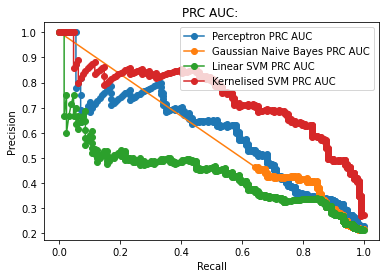

In [43]:
# perceptron
plt.plot(tpr1,pr1,'o-',label='Perceptron PRC AUC');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC AUC: ')
plt.plot(tpr2,pr2,'o-',label='Gaussian Naive Bayes PRC AUC');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid()
plt.plot(tpr3,pr3,'o-',label='Linear SVM PRC AUC');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid()
plt.plot(tpr4,pr4,'o-',label='Kernelised SVM PRC AUC');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid()
plt.legend()

v. Write your observations about the ROC and PR curves.

#### Observations:
Kernelised svm with kernel='rbf' and C=1 has larger area under ROC and PR curves, when compared with the remaining classifiers. So the RBF Kernel SVM is a better classifier among all the classifiers.

## Question 4

(i) Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different color. What are your observations about the data based on this plot?

Note: The number of dimensions of each image is dxd=28x28=784

In [44]:
from sklearn.decomposition import PCA #import PCA
pca2 = PCA(n_components=2)
projected=pca2.fit_transform(Xtrain)
print(projected.shape)

(3000, 2)


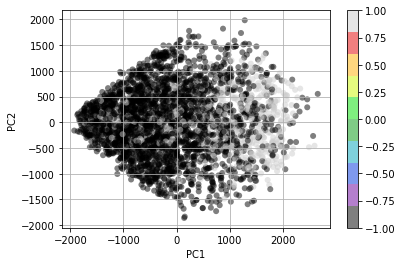

In [46]:
i1 = 0 #first principal component
i2 = 1 #second principal component
plt.scatter(projected[:, i1], projected[:, i2],
            c=Ytrain, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
plt.show()

###### Observations:


(ii) Reduce the number of dimensions of the training and test data together using PCA to 2 and plot a scatter plot of the training and test data showing examples of each set in a different color (or marker style). What are your observations about the data based on this plot?

(6000, 2)


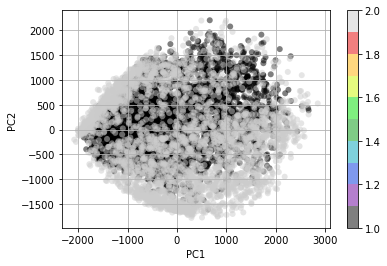

In [47]:
train_and_test=np.concatenate((Xtrain,Xtest))
Y_alt=np.zeros(6000)
for i in range(3000):
    Y_alt[i]=1
for i in range(3000,6000):
    Y_alt[i]=2

pca2 = PCA(n_components=2)
projected_2=pca2.fit_transform(train_and_test)
print(projected_2.shape)

i1 = 0 #first principal component
i2 = 1 #second principal component
plt.scatter(projected_2[:, i1], projected_2[:, i2],
            c=Y_alt, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
plt.show()

#### What are your observations about the data based on this plot?


(iii) Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.

In [48]:
pca784 = PCA(n_components=784)
projected784=pca784.fit_transform(Xtrain)
print(projected784.shape)

(3000, 784)


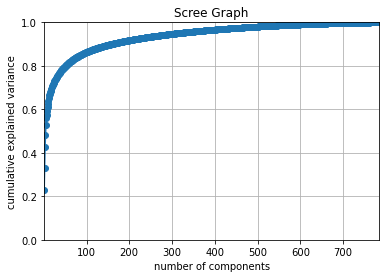

In [49]:
plt.plot(np.arange(len(pca784.explained_variance_ratio_))+1,np.cumsum(pca784.explained_variance_ratio_),'o-') #plot the scree graph
plt.axis([1,len(pca784.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Graph')
plt.grid()
plt.show()

By trial and error, the dimension=318 explains 95% variance in the training set, as shown in the following code:

In [50]:
n_components=318
pca = PCA(n_components)
projected=pca.fit_transform(Xtrain)
print("Variance of each component: ",pca.explained_variance_ratio_)
print("Total variance explained by", n_components, " dimensions is : ", sum(list(pca.explained_variance_ratio_))*100, 2)

Variance of each component:  [2.30389447e-01 9.91223310e-02 9.68887200e-02 5.44902585e-02
 4.85062944e-02 2.91409425e-02 1.76995685e-02 1.71640684e-02
 1.58081186e-02 1.54328226e-02 1.50914054e-02 1.42603730e-02
 1.09795991e-02 7.11429413e-03 6.65116290e-03 5.80385522e-03
 5.48374782e-03 5.43557022e-03 5.35238897e-03 5.18755050e-03
 5.16009686e-03 4.96790076e-03 4.76660199e-03 4.47807532e-03
 4.03498555e-03 3.91547430e-03 3.66372767e-03 3.53017861e-03
 3.46628019e-03 3.41522034e-03 3.26709410e-03 3.18803513e-03
 3.10288545e-03 3.04784567e-03 2.96575660e-03 2.87213951e-03
 2.73807865e-03 2.71255402e-03 2.65464687e-03 2.59847592e-03
 2.45485573e-03 2.39689422e-03 2.31670028e-03 2.20257605e-03
 2.17076442e-03 2.15587624e-03 2.11119548e-03 2.10143989e-03
 2.00201556e-03 1.98809618e-03 1.96377128e-03 1.88617764e-03
 1.83512232e-03 1.81326443e-03 1.80411670e-03 1.77877251e-03
 1.72096958e-03 1.71504915e-03 1.67491856e-03 1.65799391e-03
 1.62952651e-03 1.58701089e-03 1.57541459e-03 1.55505418

(iv) Reduce the number of dimensions of the data using PCA and perform classification.
What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!

In [51]:
# first find the number of dimensions that explains 80% variance
n_components=51
pca = PCA(n_components)
projected=pca.fit_transform(Xtrain)
print("Variance of each component: ",pca.explained_variance_ratio_)
print("Total variance explained by", n_components, " dimensions is : ", sum(list(pca.explained_variance_ratio_))*100, 2)

Variance of each component:  [0.23038945 0.09912233 0.09688872 0.05449026 0.04850629 0.02914094
 0.01769957 0.01716407 0.01580812 0.01543282 0.01509141 0.01426037
 0.0109796  0.00711429 0.00665116 0.00580386 0.00548375 0.00543557
 0.00535239 0.00518755 0.0051601  0.0049679  0.0047666  0.00447807
 0.00403498 0.00391547 0.00366372 0.00353017 0.00346626 0.00341518
 0.00326705 0.00318789 0.00310286 0.00304779 0.00296569 0.00287156
 0.00273761 0.00271221 0.00265373 0.00259793 0.00245345 0.00239529
 0.00231552 0.00219937 0.00216893 0.00215163 0.0021069  0.00209085
 0.00198861 0.00194251 0.00193483]
Total variance explained by 51  dimensions is :  80.02931760598503 2


In [55]:
parameters = {'kernel':['rbf'], 'C':[0.1, 1, 10, 100, 1000],'gamma':[1, 'scale']}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='average_precision')
clf.fit(projected, Ytrain)
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.423158,0.010632,0.195605,0.008317,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
1,0.122088,0.006387,0.059361,0.006249,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.656937,0.750325,0.723805,0.683338,0.624660,0.687813,0.045088,5
2,0.433706,0.012901,0.207168,0.012788,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
3,0.127520,0.006004,0.055322,0.006130,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.689921,0.808219,0.781327,0.716930,0.697325,0.738744,0.047361,2
4,0.481570,0.023456,0.191795,0.008607,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
5,0.141431,0.009943,0.053107,0.007652,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.701487,0.793292,0.793967,0.735243,0.762576,0.757313,0.035410,1
6,0.474479,0.012509,0.199568,0.006102,100,1,rbf,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
7,0.176086,0.006089,0.053109,0.007651,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.684835,0.721632,0.757726,0.715568,0.734569,0.722866,0.023889,3
8,0.490809,0.013111,0.187819,0.001892,1000,1,rbf,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",0.226971,0.209622,0.240984,0.224366,0.217034,0.223795,0.010511,6
9,0.194898,0.015194,0.058439,0.010274,1000,scale,rbf,"{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}",0.681014,0.724477,0.755117,0.713248,0.729754,0.720722,0.024130,4


In [56]:
print("The optimal classifier is: ",clf.best_estimator_)
print("The classification score is",clf.best_score_)

The optimal classifier is:  SVC(C=10)
The classification score is 0.7573129937903396


Kernelised svm(rbf) performs better based on the AUC-PRC, after the dimensionality is reduced to 51.

## Question 5

Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any
tools or approaches at your disposal. However, no external data sources may be used. Describe your
pipeline and report your outputs over the test data set. (You are required to submit your prediction
file together with the assignment in a zip folder). Your prediction file should be a single column file
containing the prediction score of the corresponding example in Xtest (be sure to have the same
order as the order of the test examples in Xtest!). Your prediction file should be named by your
student ID, e.g., u100011.csv.


In [80]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
Normalizer = preprocessing.Normalizer()
pca = PCA()
clf = SVC()
# declaring the pipeline
clf_pipeline = Pipeline([
    ('normalizer',Normalizer),("PCA",pca),('model', clf)
])

# Create a dictionary of tuning parameters (hyperparameters)
grid_parameters={'model__kernel':['rbf'], 'model__C':[0.1, 1, 10, 100, 1000],'model__gamma':[1,'scale'],'PCA__n_components':[51]}

gs = GridSearchCV(clf_pipeline, grid_parameters, scoring='average_precision')
gs.fit(Xtrain, Ytrain)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))

# 
grid_predictions = gs.predict(Xtest)

# save the predictions into a csv file
pd.DataFrame(grid_predictions).to_csv("u2261061.csv",header=None, index=None)

Best Score of train set: 0.7592192015886956
Best parameter set: {'PCA__n_components': 51, 'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}


## Question 6

Using the data given to you, consider an alternate classification problem in which the label of an
example is based on whether it is a part of the training set (label = -1) or the test set (label = +1).
Calculate the average and standard deviation of AUC-ROC using 5-fold stratified cross-validation for a
classifier that is trained to solve this prediction task. What is the implication of this AUC-ROC value?
Show code for this analysis and clearly explain your conclusions with supporting evidence.

In [81]:
# load the datasets
Xtrain_alt=np.concatenate((Xtrain,Xtest))

In [82]:
len(Xtrain_alt)

6000

In [83]:
Ytrain_alt=np.zeros(6000)

In [84]:
for i in range(3000):
    Ytrain_alt[i]=-1
for i in range(3000,6000):
    Ytrain_alt[i]=1

In [85]:
len(Ytrain_alt)

6000

Accuracy for fold:  0 is:  0.985
Balanced accuracy for fold:  0 is:  0.985
Fold  0 AUC ROC: 0.9975555555555555
Fold  0 AUC PRC:  0.9980969106349251
Accuracy for fold:  1 is:  0.9866666666666667
Balanced accuracy for fold:  1 is:  0.9866666666666666
Fold  1 AUC ROC: 0.9986138888888888
Fold  1 AUC PRC:  0.9985146859323225
Accuracy for fold:  2 is:  0.9883333333333333
Balanced accuracy for fold:  2 is:  0.9883333333333333
Fold  2 AUC ROC: 0.9972
Fold  2 AUC PRC:  0.9981803682147383
Accuracy for fold:  3 is:  0.9875
Balanced accuracy for fold:  3 is:  0.9875
Fold  3 AUC ROC: 0.9995611111111112
Fold  3 AUC PRC:  0.9995722981337444
Accuracy for fold:  4 is:  0.985
Balanced accuracy for fold:  4 is:  0.985
Fold  4 AUC ROC: 0.9975277777777779
Fold  4 AUC PRC:  0.9965132021891691
Mean accuracy 0.9865
Stdev accuracy 0.0013333333333333337
Mean Balanced accuracy 0.9865
Stdev Balanced accuracy 0.001333333333333331
Mean AUC ROC 0.9980916666666667
Stdev AUC ROC 0.0008754928065501326
Mean AUC PRC 0.99

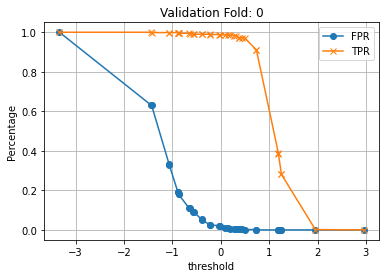

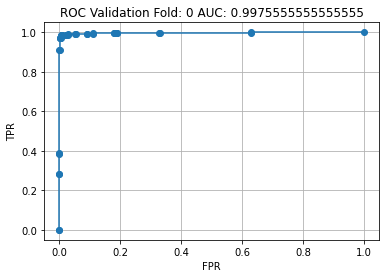

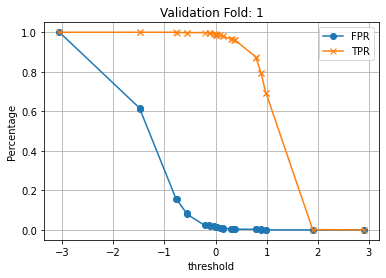

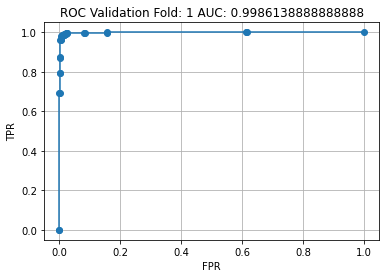

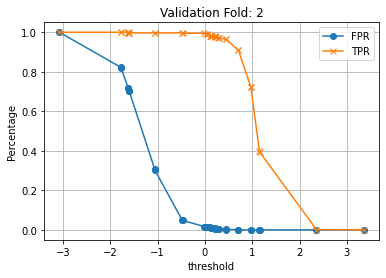

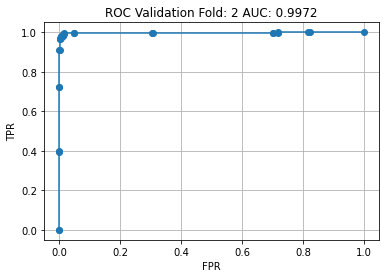

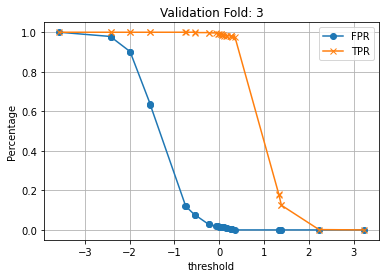

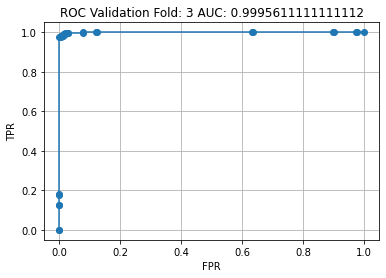

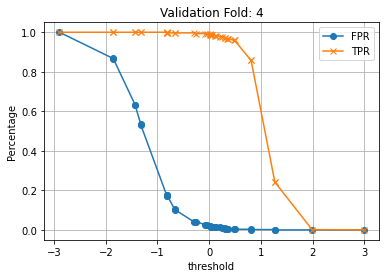

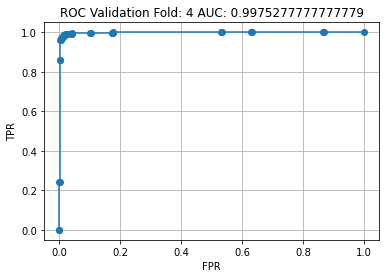

In [92]:
skf = StratifiedKFold(n_splits=5,shuffle = True)
A=[]
Balanced_Acc=[]
ROC = []
P=[]

for i,(tr_idx, v_idx) in enumerate(skf.split(Xtrain_alt, Ytrain_alt)):
    Xtr, Xv = Xtrain_alt[tr_idx], Xtrain_alt[v_idx]
    ytr, yv = Ytrain_alt[tr_idx], Ytrain_alt[v_idx]
    # or kernel='rbf'
    clf = SVC(C=10, kernel='rbf') #degree, coef0, gamma='scale',, class_weight=None  
    clf.fit(Xtr,ytr)
    
    # find accuracy on each fold
    predicted=clf.predict(Xv)
    acc = sklearn.metrics.accuracy_score(yv, predicted)
    A.append(acc)
    print("Accuracy for fold: ",i,"is: ",acc)
    
    # find balanced accuracy on each fold
    predicted=clf.predict(Xv)
    bal_acc = sklearn.metrics.balanced_accuracy_score(yv, predicted)
    Balanced_Acc.append(bal_acc)
    print("Balanced accuracy for fold: ",i,"is: ",bal_acc)
    
    z = clf.decision_function(Xv)
    roc_auc = plotROC(yv,z,pstr = 'Validation Fold: '+str(i))
    ROC.append(roc_auc)
    print('Fold ',i,'AUC ROC:',roc_auc)
    
    # find AUC PRC
    pr, tpr, tt=precision_recall_curve(yv, z)
    # prc_auc=auc(pr,tpr)
    prc_auc=average_precision_score(yv,z)
    P.append(prc_auc)
    print('Fold ',i, 'AUC PRC: ',prc_auc)  

print('Mean accuracy',np.mean(A))
print('Stdev accuracy',np.std(A))
print('Mean Balanced accuracy',np.mean(Balanced_Acc))
print('Stdev Balanced accuracy',np.std(Balanced_Acc))
print('Mean AUC ROC',np.mean(ROC))
print('Stdev AUC ROC',np.std(ROC))
print('Mean AUC PRC',np.mean(P))
print('Stdev AUC PRC',np.std(P))

#### What is the implication of this AUC-ROC value? Show code for this analysis and clearly explain your conclusions with supporting evidence.

The mean AUC-ROC is close to 1, which is the desired value. This means that the classifier separates the classes effectively. Since the training data is balanced, the AUC-PRC is also close to 1.

In [98]:
tasks_1=[Xtrain[0], Xtrain[1], Xtrain[100], Xtrain[1000]]
tasks_2=[Xtest[0], Xtest[1], Xtest[100], Xtest[1000]]
for i in range(len(tasks_1)):
    print(i,"th element in tasks_1 is predicted as",clf.predict(tasks_1[i].reshape(1,-1)))

0 th element in tasks_1 is predicted as [-1.]
1 th element in tasks_1 is predicted as [-1.]
2 th element in tasks_1 is predicted as [-1.]
3 th element in tasks_1 is predicted as [-1.]


In [99]:
for i in range(len(tasks_2)):
    print(i,"th element in tasks_2 is predicted as",clf.predict(tasks_2[i].reshape(1,-1)))

0 th element in tasks_2 is predicted as [1.]
1 th element in tasks_2 is predicted as [1.]
2 th element in tasks_2 is predicted as [1.]
3 th element in tasks_2 is predicted as [1.]


As demonstrated above the classifier has high separatability.